<center>
<h4>Diplomatura Datos 2021 - FaMAF - UNC</h4>
<h1>Aplicando Machine Learning para predicción de demanda</h1>
<h3>Aprendizaje No Supervisado</h3>
</center>
</left>
<h4>Dario Yvanoff</h4>
</left>

[Proyecto para Mentoría](https://sites.google.com/view/mentorias2021-diplodatos/aplicando-machine-learning-para-predicci%C3%B3n-de-demanda?authuser=0)

# Información Importante

En la presente notebook, se presentará la consigna a seguir para el cuarto y último práctico correspondiente a las materia Aprendizaje No Supervisado. En esta notebook se enumeran las consignas que permitirán implementar los pasos necesarios en la aplicación de métodos de aprendizaje no supervisado para encontrar patrones sistematizables. El objetivo final de este práctico es agrupar los datos para que podamos ver los productos que son comprados juntos por los clientes y de esa manera poder ofrecerles en conjunto al cliente.

Como este es el practico final se solicita que tanto este práctico como todos los anteriores de la presente mentoria sean presentados en un unico repositorio git.

Para este práctico, al igual que en los anteriores, el repositorio debe presentar:
- una notebook respondiendo las consignas de este práctico
- un informe (formato html, ppt o pdf) con las respuestas de este práctico. Dicho informe servirá de base para obtener la información a presentar en el video final de la mentoria. 

Se recomienda que el informe tenga las siguientes secciones:
- Introducción 
- Respuestas a los puntos del práctico
- Principales conclusiones




# Entregable 
Fecha de Entrega de este practico y el informe: 02/10/2021

# Introducción

En este práctico vamos a concentrarnos principalmente en los métodos que nos permitan identificar grupos de productos que se requiren o venden en forma conjunta de manera de que seamos capaces de agrupar comportamientos de clientes y de esa manera se puedan realizar recomendaciones de productos para cross selling o incluso conformar combos de productos que aumenten las ventas.

Incluso, al poder responder a la pregunta: ¿Qué productos se venderían juntos? Identificamos clusters de productos que pueden distribuirse conjuntamente antes que efectivamente se compren.

# Importacion de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Consignas

### 1- Preparar el dataset

Para las 6 categorias de productos mas vendidos y las 3 provincias que mas venden generar un dataset que contenga las siguientes características: 
- provincia
- localidad
- cantidad x categoria: cantidad total pedida en la categoria  

Por el análisis realizado para el primer informe sabemos que las 3 provincias que mas venden son:
- Buenos Aires
- Córdoba
- Santa Fe 

y las 6 categorias mas vendidas son:
- 07 - SABORES COMUNES
- 08 - SABORES ESPECIALES
- 17 - POTE 1 LTS
- 16 - FAMILIAR
- 10 - PALITOS CREMA / FRUTAL / BOMBON
- 09 - SABORES PREMIUM

Así que importamos el DataFrame obtenido del primer practico y filtramos las categorias y provincias que corresponden

In [2]:
df = pd.read_csv('dataset_new.zip', parse_dates = [15], dtype={'time': object})

In [3]:
top_prov = ['Buenos Aires', 'Córdoba', 'Santa Fe']
top_cat = ['07 - SABORES COMUNES', '08 - SABORES ESPECIALES', '17 - POTE 1 LTS', '16 - FAMILIAR', '10 - PALITOS CREMA / FRUTAL / BOMBON', '09 - SABORES PREMIUM']

df_filter = df[['Localidad','Provincia', 'Categoria','cantidad_pedida']]
df_filter = df_filter[df_filter.Provincia.isin(top_prov)]
df_filter = df_filter[df_filter.Categoria.isin(top_cat)]
df_filter

,Localidad,Provincia,Categoria,cantidad_pedida
4,Montecristo,Córdoba,07 - SABORES COMUNES,3.0
5,Montecristo,Córdoba,07 - SABORES COMUNES,1.0
6,Montecristo,Córdoba,07 - SABORES COMUNES,2.0
7,Montecristo,Córdoba,07 - SABORES COMUNES,3.0
8,Montecristo,Córdoba,07 - SABORES COMUNES,1.0
...,...,...,...,...
4218710,"Esteban Echeverria, Monte Grande",Buenos Aires,09 - SABORES PREMIUM,2.0
4218711,"Esteban Echeverria, Monte Grande",Buenos Aires,09 - SABORES PREMIUM,3.0
4218712,"Esteban Echeverria, Monte Grande",Buenos Aires,09 - SABORES PREMIUM,3.0
4218713,"Esteban Echeverria, Monte Grande",Buenos Aires,09 - SABORES PREMIUM,2.0


In [4]:
df_grouped = df_filter.groupby(['Provincia', 'Localidad', 'Categoria']).sum().reset_index()
df_grouped

,Provincia,Localidad,Categoria,cantidad_pedida
0,Buenos Aires,"25 De Mayo, 25 De Mayo",07 - SABORES COMUNES,2744.0
1,Buenos Aires,"25 De Mayo, 25 De Mayo",08 - SABORES ESPECIALES,1000.0
2,Buenos Aires,"25 De Mayo, 25 De Mayo",09 - SABORES PREMIUM,693.0
3,Buenos Aires,"25 De Mayo, 25 De Mayo",10 - PALITOS CREMA / FRUTAL / BOMBON,1790.0
4,Buenos Aires,"25 De Mayo, 25 De Mayo",16 - FAMILIAR,1340.0
...,...,...,...,...
2327,Santa Fe,Zavalla,08 - SABORES ESPECIALES,24.0
2328,Santa Fe,Zavalla,09 - SABORES PREMIUM,8.0
2329,Santa Fe,Zavalla,10 - PALITOS CREMA / FRUTAL / BOMBON,12.0
2330,Santa Fe,Zavalla,16 - FAMILIAR,13.0


In [5]:
df_cluster = df_grouped.pivot(index=['Provincia', 'Localidad'], columns='Categoria', values='cantidad_pedida').rename_axis('', axis='columns').reset_index()
df_cluster

,Provincia,Localidad,07 - SABORES COMUNES,08 - SABORES ESPECIALES,09 - SABORES PREMIUM,10 - PALITOS CREMA / FRUTAL / BOMBON,16 - FAMILIAR,17 - POTE 1 LTS
0,Buenos Aires,"25 De Mayo, 25 De Mayo",2744.0,1000.0,693.0,1790.0,1340.0,2206.0
1,Buenos Aires,"3 De Febrero, 3 De Febrero",2701.0,1045.0,627.0,1835.0,675.0,1272.0
2,Buenos Aires,"3 De Febrero, Caseros",5384.0,2570.0,1908.0,4118.0,1488.0,1570.0
3,Buenos Aires,"3 De Febrero, Ciudadela",1559.0,771.0,568.0,2910.0,372.0,1357.0
4,Buenos Aires,"3 De Febrero, Remedios De Escalada",2795.0,1037.0,668.0,2208.0,758.0,1796.0
...,...,...,...,...,...,...,...,...
385,Santa Fe,Villa Constitucion,6100.0,2133.0,1515.0,2269.0,1837.0,3081.0
386,Santa Fe,Villa Gobernador Galvez,8442.0,2906.0,2050.0,13020.0,3919.0,15568.0
387,Santa Fe,Villa Ocampo,3465.0,973.0,391.0,1593.0,1739.0,3449.0
388,Santa Fe,Wheelwright,848.0,378.0,234.0,400.0,418.0,345.0


In [6]:
df_cluster.isna().sum()


Provincia                               0
Localidad                               0
07 - SABORES COMUNES                    1
08 - SABORES ESPECIALES                 1
09 - SABORES PREMIUM                    1
10 - PALITOS CREMA / FRUTAL / BOMBON    2
16 - FAMILIAR                           2
17 - POTE 1 LTS                         1
dtype: int64

In [7]:
df_cluster[df_cluster['16 - FAMILIAR'].isna()]

,Provincia,Localidad,07 - SABORES COMUNES,08 - SABORES ESPECIALES,09 - SABORES PREMIUM,10 - PALITOS CREMA / FRUTAL / BOMBON,16 - FAMILIAR,17 - POTE 1 LTS
323,Córdoba,Villa Los Llanos,413.0,209.0,84.0,NaN,NaN,NaN
327,Córdoba,Villa Santa Cruz del Lago,NaN,NaN,NaN,NaN,NaN,6.0


In [8]:
# Como son pocas, eliminamos las filas que tienen algún NaN
df_cluster = df_cluster.dropna()

### 2- Separar Datos de muestra del dataset

Como este es un problema de aprendizaje no supervisado, no contamos con datos de compración de los resultaods por lo que vamos a separar algunos datos de muestras al azar de nuestro dataset para ver luego si corresponden a algún clúster encontrado y poder obtener conclusiones.

Para esto, elegir 10 filas del dataset al azar (utilizar la instrucción loc), almacenarlas en un nuevo dataframe llamado "muestras" y eliminar dichas filas del dataset de entrada (utilizar la instrucción drop). Este dataframe denominado "muestras" lo utilizaremos luego el análisis final 

Ejemplo de código :

indices = [1,11,22,33,44,55,66,77,88,99]  

muestras = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)

df = df.drop(indices, axis = 0)

In [9]:
np.random.seed(3)
indices = np.random.randint(low=0, high=len(df_cluster), size=(10,))
print(indices)

muestras = pd.DataFrame(df_cluster.loc[indices], columns = df_cluster.keys()).reset_index(drop = True)

df_datos = df_cluster.drop(indices, axis = 0)
df_datos

[362 152 249 131 256 277 147 202 363 169]


,Provincia,Localidad,07 - SABORES COMUNES,08 - SABORES ESPECIALES,09 - SABORES PREMIUM,10 - PALITOS CREMA / FRUTAL / BOMBON,16 - FAMILIAR,17 - POTE 1 LTS
0,Buenos Aires,"25 De Mayo, 25 De Mayo",2744.0,1000.0,693.0,1790.0,1340.0,2206.0
1,Buenos Aires,"3 De Febrero, 3 De Febrero",2701.0,1045.0,627.0,1835.0,675.0,1272.0
2,Buenos Aires,"3 De Febrero, Caseros",5384.0,2570.0,1908.0,4118.0,1488.0,1570.0
3,Buenos Aires,"3 De Febrero, Ciudadela",1559.0,771.0,568.0,2910.0,372.0,1357.0
4,Buenos Aires,"3 De Febrero, Remedios De Escalada",2795.0,1037.0,668.0,2208.0,758.0,1796.0
...,...,...,...,...,...,...,...,...
385,Santa Fe,Villa Constitucion,6100.0,2133.0,1515.0,2269.0,1837.0,3081.0
386,Santa Fe,Villa Gobernador Galvez,8442.0,2906.0,2050.0,13020.0,3919.0,15568.0
387,Santa Fe,Villa Ocampo,3465.0,973.0,391.0,1593.0,1739.0,3449.0
388,Santa Fe,Wheelwright,848.0,378.0,234.0,400.0,418.0,345.0


In [10]:
muestras

,Provincia,Localidad,07 - SABORES COMUNES,08 - SABORES ESPECIALES,09 - SABORES PREMIUM,10 - PALITOS CREMA / FRUTAL / BOMBON,16 - FAMILIAR,17 - POTE 1 LTS
0,Santa Fe,Rosario,52793.0,25190.0,18981.0,31191.0,11669.0,36806.0
1,Buenos Aires,"Moreno, Moreno",7742.0,3752.0,2495.0,3977.0,1945.0,2951.0
2,Córdoba,Corral De Bustos,3441.0,1371.0,936.0,892.0,1331.0,2923.0
3,Buenos Aires,"Lomas De Zamora, Fiorito",2280.0,844.0,450.0,870.0,695.0,1337.0
4,Córdoba,Deán Funes,246.0,95.0,60.0,111.0,70.0,163.0
5,Córdoba,Las Peñas,897.0,360.0,144.0,610.0,329.0,481.0
6,Buenos Aires,"Merlo, Libertad",3227.0,1214.0,821.0,1845.0,726.0,1986.0
7,Buenos Aires,"San Pedro, San Pedro",3051.0,960.0,574.0,2939.0,1492.0,1095.0
8,Santa Fe,Rufino,4212.0,1537.0,810.0,1926.0,1224.0,2427.0
9,Buenos Aires,"Presidente Perón, Guernica",9004.0,3585.0,1936.0,7147.0,3539.0,5022.0


### 3- Eliminar las columnas no relevantes

Eliminar del dataset generado en el punto 1 las columnas provincia y localidad. Estas columnas fueron relevantes para la generación de la información de cantidades pedidas por las categorias principales pero no son requeridas a la hora de identificar los clusters.

In [11]:
df_datos = df_datos.drop(['Provincia', 'Localidad'], axis = 1)
df_datos

,07 - SABORES COMUNES,08 - SABORES ESPECIALES,09 - SABORES PREMIUM,10 - PALITOS CREMA / FRUTAL / BOMBON,16 - FAMILIAR,17 - POTE 1 LTS
0,2744.0,1000.0,693.0,1790.0,1340.0,2206.0
1,2701.0,1045.0,627.0,1835.0,675.0,1272.0
2,5384.0,2570.0,1908.0,4118.0,1488.0,1570.0
3,1559.0,771.0,568.0,2910.0,372.0,1357.0
4,2795.0,1037.0,668.0,2208.0,758.0,1796.0
...,...,...,...,...,...,...
385,6100.0,2133.0,1515.0,2269.0,1837.0,3081.0
386,8442.0,2906.0,2050.0,13020.0,3919.0,15568.0
387,3465.0,973.0,391.0,1593.0,1739.0,3449.0
388,848.0,378.0,234.0,400.0,418.0,345.0


In [12]:
df_muestras = muestras.drop(['Provincia', 'Localidad'], axis = 1)
df_muestras

,07 - SABORES COMUNES,08 - SABORES ESPECIALES,09 - SABORES PREMIUM,10 - PALITOS CREMA / FRUTAL / BOMBON,16 - FAMILIAR,17 - POTE 1 LTS
0,52793.0,25190.0,18981.0,31191.0,11669.0,36806.0
1,7742.0,3752.0,2495.0,3977.0,1945.0,2951.0
2,3441.0,1371.0,936.0,892.0,1331.0,2923.0
3,2280.0,844.0,450.0,870.0,695.0,1337.0
4,246.0,95.0,60.0,111.0,70.0,163.0
5,897.0,360.0,144.0,610.0,329.0,481.0
6,3227.0,1214.0,821.0,1845.0,726.0,1986.0
7,3051.0,960.0,574.0,2939.0,1492.0,1095.0
8,4212.0,1537.0,810.0,1926.0,1224.0,2427.0
9,9004.0,3585.0,1936.0,7147.0,3539.0,5022.0


### 4- Normalizacion de los datos 

En este paso se deben normalizar los datos de manera de que los mismos esten en condiciones de ser utilizados por los algoritmos de clustering.

In [13]:
from sklearn import preprocessing

datos_norm = pd.DataFrame(preprocessing.Normalizer().fit_transform(df_datos), columns=df_datos.columns)

muestras_norm = pd.DataFrame(preprocessing.Normalizer().fit_transform(df_muestras), columns=df_muestras.columns)

In [14]:
datos_norm.head()

,07 - SABORES COMUNES,08 - SABORES ESPECIALES,09 - SABORES PREMIUM,10 - PALITOS CREMA / FRUTAL / BOMBON,16 - FAMILIAR,17 - POTE 1 LTS
0,0.631582,0.230169,0.159507,0.412002,0.308426,0.507752
1,0.716232,0.277106,0.166263,0.486592,0.178992,0.337300
2,0.690087,0.329407,0.244556,0.527820,0.190723,0.201233
3,0.419737,0.207580,0.152926,0.783474,0.100155,0.365352
4,0.658622,0.244362,0.157409,0.520300,0.178617,0.423215


### 5- Encontramos clusters

En este paso procedemos a utilizar K-Means para identificar cluster de categorias de productos que se venden juntos

In [15]:
from sklearn.cluster import KMeans
X = datos_norm.copy()
X_m = muestras_norm.copy()

Encontrar el valor de K utilizando el metodo del codo (elbow). El método del codo consiste en calcular y graficar la suma de cuadrado en cada número de clústeres, y allí buscas un cambio de pendiente de empinada a poca profundidad, un codo, para determinar el número óptimo de clústeres.  Para cada valor de K calcular la inercia la cual es la suma total del cuadrado dentro del clúster. El codigo de ejemplo siguiente itera 20 veces. Identificar si esa cantidad de iteración es suficiente.

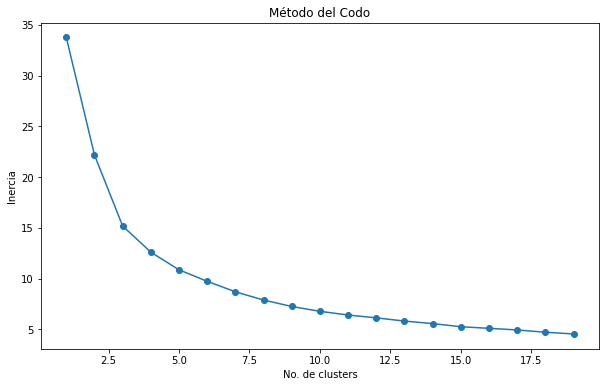

In [16]:
## Hallar el valor óptimo de K utilizando el método elbow ##
#Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

En función del gráfico anterior identifique el valor de K a utilizar. Esto servirá para indicar el parámetro n_cluster. 

El parámetro “init” por defecto utiliza “k-means++”.

El parámetro “max_iter” es el número máximo de iteraciones del algoritmo K Means para una sola ejecución, por defecto es 300. Variar este parámetro e indicar si mejoran los resultados.

El último parámetro a confgiurar en esta oportunidad es “n_init" el cual es el número de veces que el algoritmo se ejecutará con diferentes centroides. El valor por defecto es de 10. Variar este parámetro e indicar si mejoran los resultados.

In [17]:
# Elegimos k=4
k =  4
model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10)
model.fit(X)
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = model.cluster_centers_, model.labels_

Verificamos los datos de muestras que separamos del dataset original para ver a que cluster pertenecen

In [18]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = model.predict(muestras_norm)
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 0
Muestra 3 se encuentra en el clúster: 0
Muestra 4 se encuentra en el clúster: 0
Muestra 5 se encuentra en el clúster: 0
Muestra 6 se encuentra en el clúster: 0
Muestra 7 se encuentra en el clúster: 3
Muestra 8 se encuentra en el clúster: 0
Muestra 9 se encuentra en el clúster: 0


### 6- Graficamos los clusters encontrados


En este punto graficar los clusters encontrados 

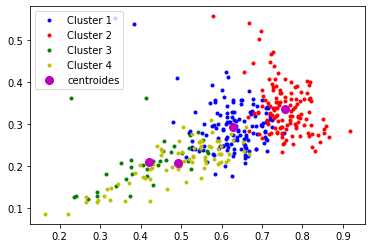

In [19]:
colors = ['b.', 'r.', 'g.', 'y.']

for i in range(k):
    plt.plot(X[etiquetas==i].iloc[:,0],X[etiquetas==i].iloc[:,1], colors[i], label='Cluster ' + str(i+1))

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')

plt.show()

### 7- Utilizamos PCA y graficamos 

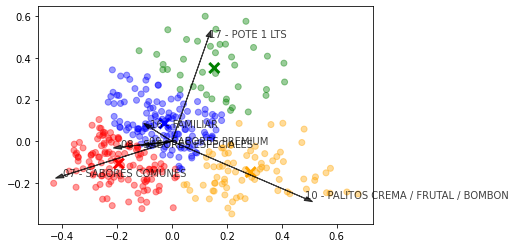

In [20]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = X.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()

En la gráfica se pueden visualizar una serie de flechas que indican ls proyección de cada característica en el eje principal del componente. Estas flechas representan el nivel de importancia de cada característica en la escala multidimensional. Tambien se pueden observar si hay grupos bien definidos o hay puntos intercalados lo cual indicaria que son categorias que se venden en conjunto.

### 8- Conclusiones

Elaborar las conclusiones en función de los gráficos de cluster encontrados.

La respuesta se encuentra en el informe